# Exploring Data

You have a data set and you want to do some exploratory data analysis. The dataset we use in this example is the `titanic` set which contains information about the pasengers of the titanic.

## Reading the data

To read the data from a csv file we use the `read_csv()` funciton from the [`pandas`](https://pandas.pydata.org/) package.

In [109]:
import pandas as pd
import seaborn as sns

titanic_df = sns.load_dataset("titanic")
#titanic_df = pd.read_csv("../datasets/titanic_train.csv")

Some usefull functions for a quick exploration are:
- `head()` shows you the first 5 rows
- `info()` shows the missing values per variable
- `describe()` shows some basic statistics for all the numaric variables

In [110]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [111]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [112]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualization with Matplotlib

Importing the Matplotlib package is by convention done in the following way.

In [113]:
import matplotlib.pyplot as plt

To be able to display the plots in a notebook we need to use:

- `%matplotlib inline` for static images
- `%matplotlib notebook` for interactive images

In [114]:
%matplotlib inline

### One Variable

When exploring one variable a histogram is the most useful graph.

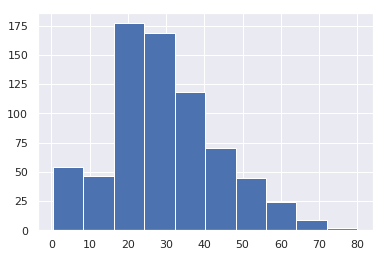

In [115]:
titanic_df['age'].hist()

### Two Variables: continues and continues

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


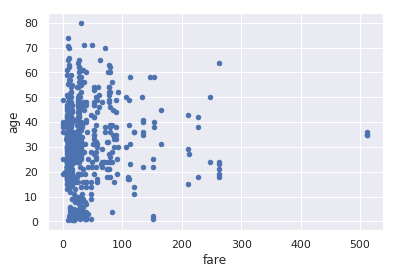

In [116]:
titanic_df.plot(kind='scatter', x='fare', y='age')

But the `matplotlib` library can not work well with `DataFrames`. To be able to do that and have more options we will use the [`seaborn`](https://seaborn.pydata.org/) library. This library is built on top of `matplotlib` so everything that you do in `seaborn` could be done in `matplotlib` as well, it just requires a lot less code.

## Visualization with Seaborn

Using the `set()` function the style of plots created using `matplotlib` is changed to look a bit more modern.

In [117]:
import seaborn as sns
sns.set()

### One Variable

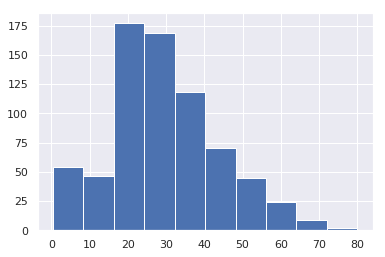

In [118]:
titanic_df['age'].hist()

In [119]:
#sns.distplot(titanic_df['age'])

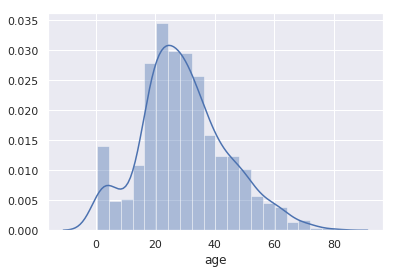

In [120]:
age_notnull = titanic_df.loc[titanic_df['age'].notnull(), 'age']
sns.distplot(age_notnull)

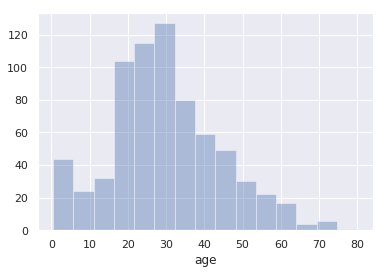

In [121]:
sns.distplot(age_notnull, bins=15, kde=False)

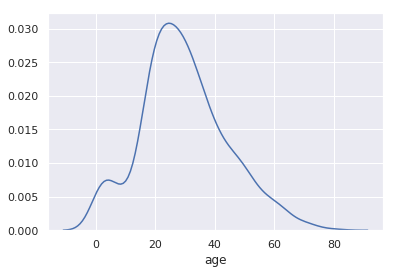

In [122]:
sns.distplot(age_notnull, bins=15, hist=False)

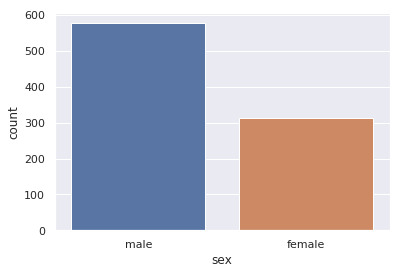

In [123]:
sns.countplot(x="sex", data=titanic_df)

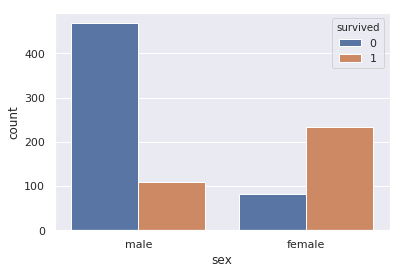

In [124]:
sns.countplot(x="sex", hue="survived", data=titanic_df)

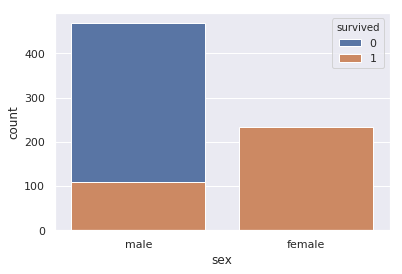

In [125]:
sns.countplot(x="sex", hue="survived", dodge=False, data=titanic_df)

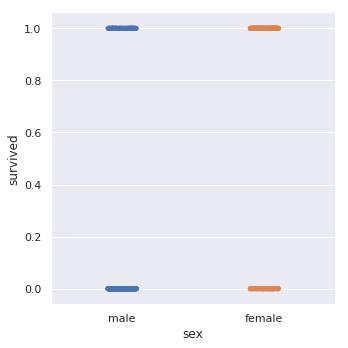

In [126]:
sns.catplot(x='sex', y="survived", data=titanic_df)

### Two Variables: continues and continues

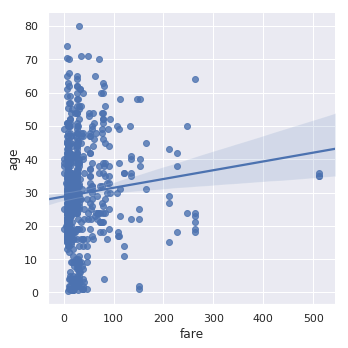

In [127]:
sns.lmplot(x="fare", y="age", data=titanic_df)

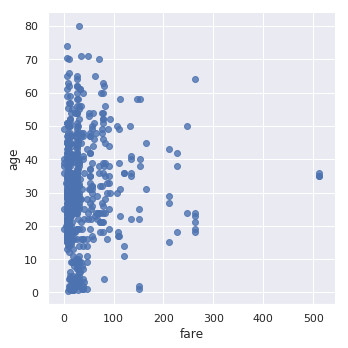

In [128]:
sns.lmplot(x="fare", y="age", fit_reg=False, data=titanic_df)

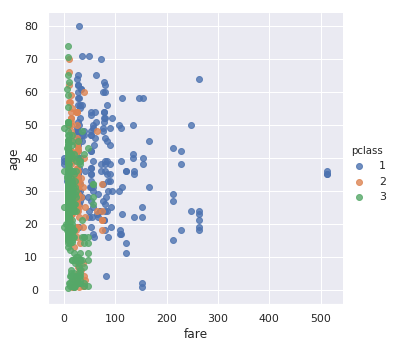

In [129]:
sns.lmplot(x="fare", y="age", fit_reg=False, hue="pclass", data=titanic_df)

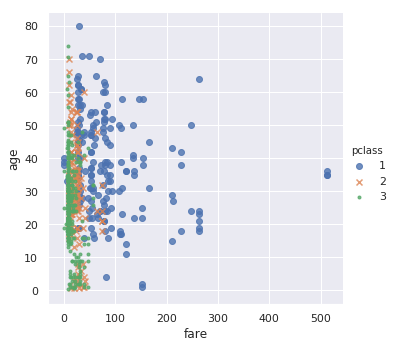

In [130]:
sns.lmplot(x="fare", y="age", fit_reg=False, hue="pclass", markers=['o', 'x', '.'], data=titanic_df)

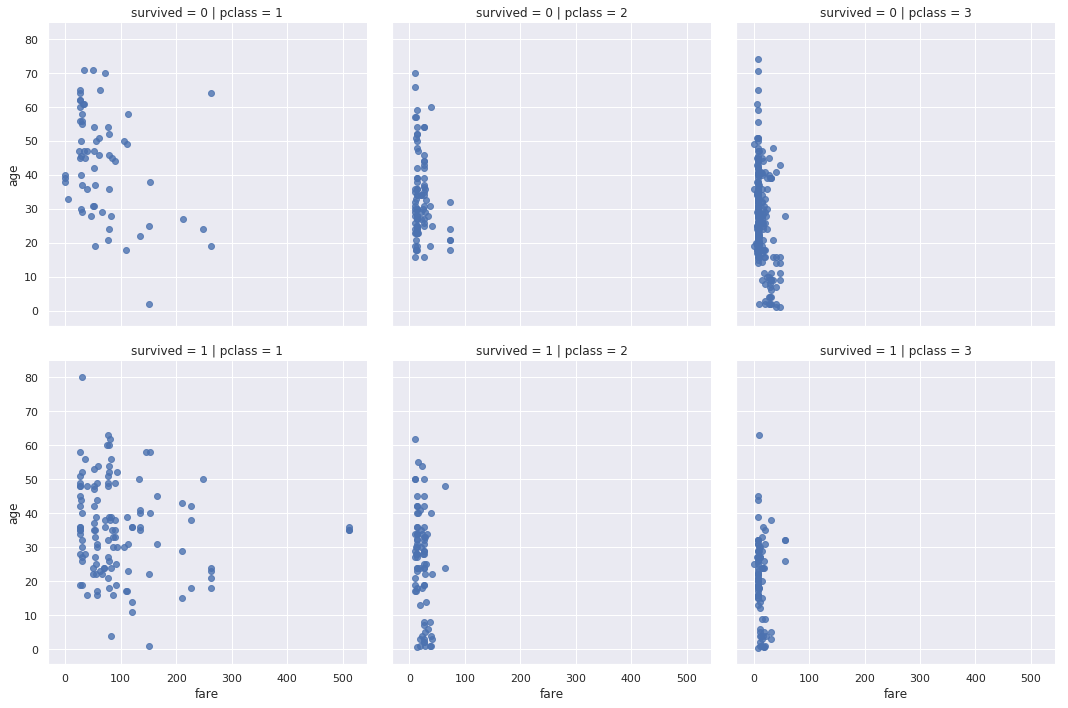

In [131]:
sns.lmplot(x="fare", y="age", fit_reg=False, col="pclass", row="survived", data=titanic_df)

### Two Variables: continues and discrete

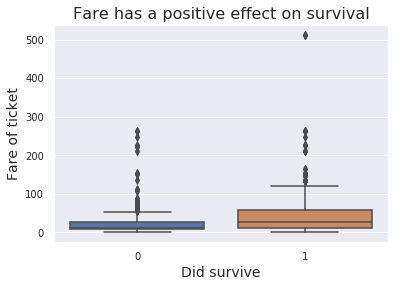

In [132]:
bplot = sns.boxplot(x="survived", y="fare", data=titanic_df)
bplot.axes.set_title("Fare has a positive effect on survival",
                    fontsize=16)
bplot.set_xlabel("Did survive", 
                fontsize=14)
 
bplot.set_ylabel("Fare of ticket",
                fontsize=14)
bplot.tick_params(labelsize=10)

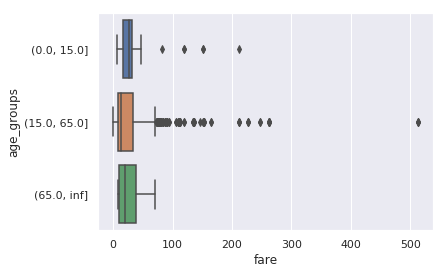

In [133]:
import numpy as np

titanic_df['age_groups'] = pd.cut(titanic_df['age'], 4)
titanic_df['age_groups'] = pd.cut(titanic_df['age'], [0, 15, 65, np.inf])
sns.boxplot(y='age_groups', x='fare', data=titanic_df)

### Two Variables: discrete and discrete

/home/wim/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


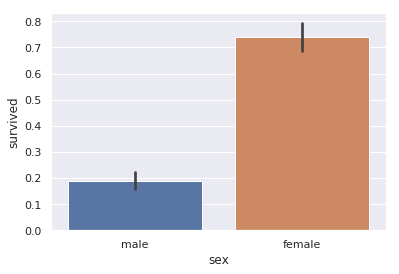

In [134]:
sns.barplot(x="sex", y="survived", data=titanic_df)

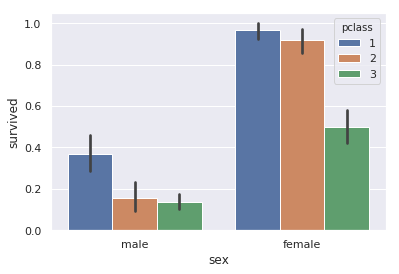

In [135]:
sns.barplot(x="sex", y="survived", hue="pclass", data=titanic_df)

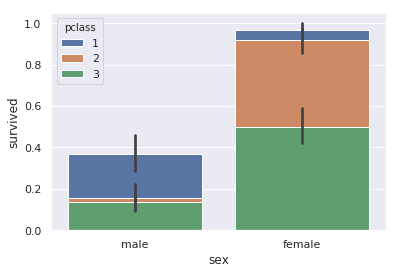

In [136]:
sns.barplot(x="sex", y="survived", hue="pclass", dodge=False, data=titanic_df)

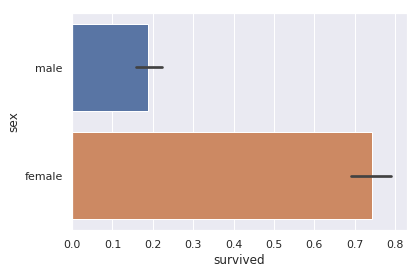

In [137]:
sns.barplot(x="survived", y="sex", data=titanic_df)

## Transforming Data

Now we will show some example on how to transform your data for exploration

### Filtering

In [138]:
males = titanic_df[titanic_df['sex']=='male']
males.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,"(15.0, 65.0]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,"(15.0, 65.0]"
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,"(15.0, 65.0]"
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,"(0.0, 15.0]"


In [139]:
males = titanic_df[titanic_df['sex']=='male']
males.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,"(15.0, 65.0]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,"(15.0, 65.0]"
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,"(15.0, 65.0]"
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,"(0.0, 15.0]"


In [140]:
pclass_12 = titanic_df[titanic_df['pclass']!=3]
pclass_12.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(15.0, 65.0]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(15.0, 65.0]"
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,"(15.0, 65.0]"
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,"(0.0, 15.0]"
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,"(15.0, 65.0]"


In [141]:
class_list = [1, 2]
pclass_3 = titanic_df[~titanic_df['pclass'].isin(class_list)]
pclass_3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,"(15.0, 65.0]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,"(15.0, 65.0]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,"(15.0, 65.0]"
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,"(0.0, 15.0]"


In [142]:
not_null = titanic_df[titanic_df['age'].notnull()]
not_null.shape

(714, 16)

In [143]:
titanic_df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [144]:
titanic_df[titanic_df['age']>30 & 
           (titanic_df['embarked']=='S')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,"(15.0, 65.0]"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(15.0, 65.0]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,"(15.0, 65.0]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(15.0, 65.0]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,"(15.0, 65.0]"
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,"(15.0, 65.0]"
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,"(0.0, 15.0]"
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,"(15.0, 65.0]"
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,"(0.0, 15.0]"
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,"(0.0, 15.0]"


### Sorting

In [145]:
titanic_df.sort_values(by=['age']).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False,"(0.0, 15.0]"
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False,"(0.0, 15.0]"
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False,"(0.0, 15.0]"
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False,"(0.0, 15.0]"
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False,"(0.0, 15.0]"


In [146]:
titanic_df.sort_values(by=['age'], ascending=False).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True,"(65.0, inf]"
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True,"(65.0, inf]"
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True,"(65.0, inf]"
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True,"(65.0, inf]"
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True,"(65.0, inf]"


In [147]:
titanic_df.sort_values(by=['pclass', 'age'], ascending=[True, False]).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True,"(65.0, inf]"
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True,"(65.0, inf]"
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True,"(65.0, inf]"
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False,"(65.0, inf]"
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False,"(15.0, 65.0]"


### Slicing

In [148]:
titanic_df.loc[1]

survived                  1
pclass                    1
sex                  female
age                      38
sibsp                     1
parch                     0
fare                71.2833
embarked                  C
class                 First
who                   woman
adult_male            False
deck                      C
embark_town       Cherbourg
alive                   yes
alone                 False
age_groups     (15.0, 65.0]
Name: 1, dtype: object

In [149]:
titanic_df.loc[1:3]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(15.0, 65.0]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,"(15.0, 65.0]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(15.0, 65.0]"


In [150]:
titanic_df.loc[1:4, ['survived', 'parch']]

,survived,parch
1,1,0
2,1,0
3,1,0
4,0,0


### Mutating

In [151]:
titanic_df['age_10'] = titanic_df['age'] + 10
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups,age_10
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,"(15.0, 65.0]",32.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(15.0, 65.0]",48.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,"(15.0, 65.0]",36.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(15.0, 65.0]",45.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,"(15.0, 65.0]",45.0


In [152]:
titanic_df['age_fare'] = titanic_df['age'] + titanic_df['fare']
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups,age_10,age_fare
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,"(15.0, 65.0]",32.0,29.2500
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(15.0, 65.0]",48.0,109.2833
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,"(15.0, 65.0]",36.0,33.9250
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(15.0, 65.0]",45.0,88.1000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,"(15.0, 65.0]",45.0,43.0500


In [153]:
titanic_df = titanic_df.iloc[:, :-3]
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Aggregation and Grouping

In [154]:
titanic_df.sum()['survived']

342

In [155]:
titanic_df.groupby('sex')['survived'].sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [156]:
titanic_df.groupby('sex')['age'].agg([('mean_age', 'mean'), ('min_age', 'min')])

,mean_age,min_age
sex,,
female,27.915709,0.75
male,30.726645,0.42
